<b> Predicting wine quality: A comparison between Python and R data-analysis methods</b>

<b> Overview:</b> I started this project to get my feet wet with data analysis and processing using Python. A classic, the wine quality dataset provides information on physiocochemical and sensory variables, facilitating the ability to predict the quality of the wine produced (Cortez et al, 2009). Specifically, I use the red wine dataset (publicly available here: https://archive.ics.uci.edu/ml/datasets/wine+quality). First, I'll explore this dataset using Python; later, I'll explore the dataset using R with the aim to compare the results of analyses using different languages.

<b>Relevant publication</b>

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. (2009). Modeling wine preferences by data mining from physicochemical properties. <i>Decision Support Systems, 47</i>(4), 547-553.

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import stats
from scipy.stats import zscore
import statsmodels.api as sm

In [2]:
# Read in the data: wine_data
file = 'https://github.com/nyssabulkes/Projects/blob/master/winequality-red.csv'
wine_data = pd.read_csv(file)

# Explore the data
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
# Drop duplicates
wine_data = wine_data.drop_duplicates()
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
None


<b> #1: Count something interesting: </b> In the summary of chemical properties provided with the data, we know that <b>residual sugar</b> is the amount of sugar left over after the fermentation process concludes. It's further indicated that it's unusual for a wine to have less than 1 gram/liter of residual sugar, while wines with more than 45 grams/liter are found to be too sweet.

In [4]:
# Count the observations with less than 1 gram/liter and more than 45 grams/liter: sugar
sugar = (wine_data['residual sugar'] < 1) | (wine_data['residual sugar'] > 45)
print(sum(sugar))

1


<b> #2: Find trends (e.g. high, low, increasing, decreasing, anomalies): </b> In exploring and cleaning the data, it's a smart initial step to look for outliers, or what might be considered anomalies. However, as a scientist who's new to physicochemical traits, I wanted to know: a) what outliers are there, if any; and b) where are they. Although I don't have any theoretical reason to remove outliers from these data--i.e. perhaps they're just extreme, not erroneous values--it's important to acknowledge and be aware of them, and further, to understand the role they play in the data if left in.

In [5]:
# Create a list of the column names
column_names = [col for col in wine_data]
column_names.remove('quality')

# Group data: standardized
standardized = wine_data.groupby('quality')[column_names].transform(zscore)

# Construct a Boolean Series to build a list of the outlier count per column: outliers
number_of_outliers = []
for col in column_names:
    outliers = (standardized[col] < -3) | (standardized[col] > 3)
    number_of_outliers.append(sum(outliers))

In [6]:
# Define lists_to_dict()
def lists_to_dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: new_dict
    new_dict = dict(zipped_lists)

    # Return the dictionary
    return new_dict


In [7]:
# Create dictionary of outliers
outlier_dict = lists_to_dict(column_names, number_of_outliers)
print(outlier_dict)

{'fixed acidity': 12, 'volatile acidity': 11, 'citric acid': 2, 'residual sugar': 28, 'chlorides': 33, 'free sulfur dioxide': 19, 'total sulfur dioxide': 8, 'density': 10, 'pH': 6, 'sulphates': 25, 'alcohol': 13}


<b> #3: Make a histogram: </b> To really get a good 'picture' of the data, visualization is needed. Here, I create 12 subplots showing the distribution of values in each of the 12 columns.

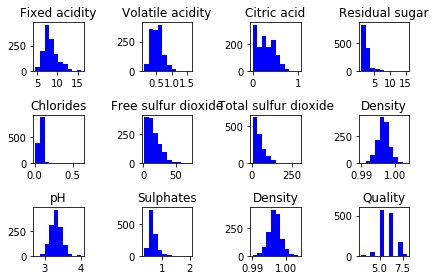

In [8]:
# Create subplots showing histograms of each grape property; the default 10 bins are used
plt.subplot(3, 4, 1)
plt.hist(wine_data['fixed acidity'], color = 'blue') 
plt.title('Fixed acidity')

plt.subplot(3, 4, 2)
plt.hist(wine_data['volatile acidity'], color = 'blue')
plt.title('Volatile acidity')

plt.subplot(3, 4, 3)
plt.hist(wine_data['citric acid'], color = 'blue')
plt.title('Citric acid')

plt.subplot(3, 4, 4)
plt.hist(wine_data['residual sugar'], color = 'blue')
plt.title('Residual sugar')

plt.subplot(3, 4, 5)
plt.hist(wine_data['chlorides'], color = 'blue')
plt.title('Chlorides')

plt.subplot(3, 4, 6)
plt.hist(wine_data['free sulfur dioxide'], color = 'blue')
plt.title('Free sulfur dioxide')

plt.subplot(3, 4, 7)
plt.hist(wine_data['total sulfur dioxide'], color = 'blue')
plt.title('Total sulfur dioxide')

plt.subplot(3, 4, 8)
plt.hist(wine_data['density'], color = 'blue')
plt.title('Density')

plt.subplot(3, 4, 9)
plt.hist(wine_data['pH'], color = 'blue')
plt.title('pH')

plt.subplot(3, 4, 10)
plt.hist(wine_data['sulphates'], color = 'blue')
plt.title('Sulphates')

plt.subplot(3, 4, 11)
plt.hist(wine_data['density'], color = 'blue')
plt.title('Density')

plt.subplot(3, 4, 12)
plt.hist(wine_data['quality'], color = 'blue')
plt.title('Quality')

plt.tight_layout()
plt.show()

<b> #4: Compare two related quantities: </b> According to the documentation of the dataset, <b>citric acid</b> contributes flavor, or "freshness" to wine. Relatedly, the wine's salt content is described in terms of <b>chlorides</b>, which could also affect the taste of the wine. In this section, I explore whether these two variables are statistically related.

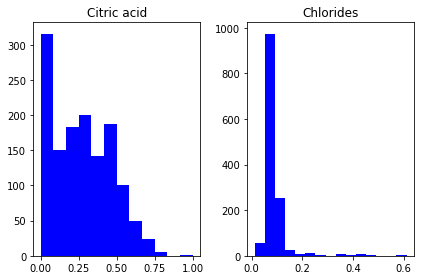

In [9]:
# Visualize citric acid and chlorides columns only; tailored bin settings
plt.subplot(1, 2, 1)
plt.hist(wine_data['citric acid'], bins=12, color='blue') 
plt.title('Citric acid')

plt.subplot(1, 2, 2)
plt.hist(wine_data['chlorides'], bins=15, color='blue')
plt.title('Chlorides')

plt.tight_layout()
plt.show()

In [10]:
# Calculate Pearson correlation coefficient, p-value
print(scipy.stats.pearsonr(wine_data['citric acid'], wine_data['chlorides']))

(0.21019453388539414, 4.9084746722901246e-15)


<b>#5: Make a scatterplot: </b> Making a scatterplot is a natural step when calculating the correlation coefficient, as it allows seeing the relationship between two variables visually. 

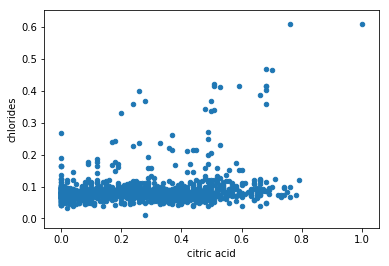

In [11]:
# Visualize relationship: scatterplot
wine_data.plot(kind='scatter', x='citric acid', y='chlorides')
plt.show()

Both the weak correlation coefficient (r=0.21) and the scatterplot provide little evidence that citric acid and chlorides are related to each other.

<b>However,</b> the documentation also suggests that <b>volatile acidity</b> is relevant for a discussion of wine flavor, where higher values can create an unpleasant, vinegar taste.

Using this same exploratory data analysis approach, we can explore how volatile acidity is related to both citric acid and to chlorides.

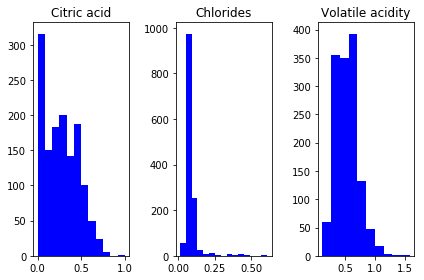

In [12]:
# Add the third subplot for volatile acidity; tailored bin settings
plt.subplot(1, 3, 1)
plt.hist(wine_data['citric acid'], bins=12, color='blue') 
plt.title('Citric acid')

plt.subplot(1, 3, 2)
plt.hist(wine_data['chlorides'], bins=15, color='blue')
plt.title('Chlorides')

plt.subplot(1, 3, 3)
plt.hist(wine_data['volatile acidity'], bins=10, color='blue')
plt.title('Volatile acidity')

plt.tight_layout()
plt.show()

In [13]:
# Calculate Pearson correlation coefficient, p-value for citric acid and volatile acidity
print(scipy.stats.pearsonr(wine_data['citric acid'], wine_data['volatile acidity']))

(-0.5512480416642106, 7.195032011644537e-109)


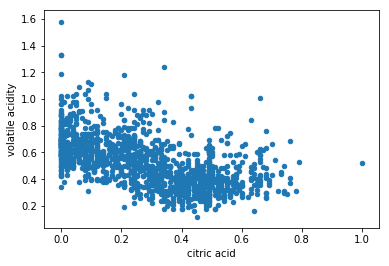

In [14]:
# Visualize moderate relationship between citric acid and volatile acidity
wine_data.plot(kind='scatter', x='citric acid', y='volatile acidity')
plt.show()

In [15]:
# Calculate Pearson correlation coefficient, p-value for chlorides and volatile acidity
print(scipy.stats.pearsonr(wine_data['chlorides'], wine_data['volatile acidity']))

(0.055153670146704616, 0.042063086754654144)


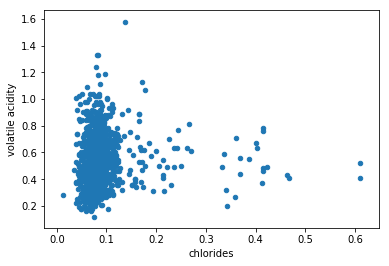

In [16]:
# Visualize (non-existant) relationship between chlorides and volatile acidity
wine_data.plot(kind='scatter', x='chlorides', y='volatile acidity')
plt.show()

The EDA revealed a moderate negative relationship between <b>citric acid</b> and <b>volatile acidity</b>. As the names of these columns suggest, this isn't entirely surprising, and this may be an example of data multicollinearity, where the independent variables are not truly independent. For example, although these values are listed in separate columns in the dataset, the reality is that two variables that each tap into acidity may not be truly independent of one another, and rather, <i>may vary together</i>. We could do a similar analysis with the other variables in the data that deal with acidity (e.g. fixed acidity) and would likely see a similar pattern. However, because we are interested in making predictions about wine quality using these variables, multicollinearity does not affect prediction, and we don't need to worry about it. 

On the other hand, <b>chlorides</b> and volatile acidity were unrelated. The scatterplot corroborates what is shown by the histogram created earlier of the distribution of values in the chlorides column, namely that the chloride values vary so minimally for every one unit of change in citric acid and volatile acidity. As a novice in the physicochemical field, I, for one, have learned that acidity is not the same thing as saltiness when it comes to wine. Interesting.

<b>But what factors predict wine quality? Wasn't that the whole point?</b>

Why, yes! Now that we've explored the data and understand it a bit better, the logical next step is to understand how these factors impact the quality of the wine, our dependent variable. The <b>quality</b> column contains a score for each observation between 0 and 10, a score determined by sensory information.

<b>Is the amount of residual sugar predictive of wine quality?</b>

To start, one of the first variables we considered was <b>residual sugar</b>, where wines with more than 45 grams per liter are found to be overly sweet. We can start by doing a simple linear regression to predict wine quality based on residual sugar.

In [17]:
# Perform a single linear regression
x = sm.add_constant(wine_data['residual sugar'])
y = wine_data['quality']

sugar_model = sm.OLS(y, x).fit()
predictions = sugar_model.predict(x) # make the predictions by the model

# Print out the statistics
sugar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2525
Date:                Sun, 26 Aug 2018   Prob (F-statistic):              0.615
Time:                        16:47:18   Log-Likelihood:                -1663.9
No. Observations:                1359   AIC:                             3332.
Df Residuals:                    1357   BIC:                             3342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6023      0.047    118.385      0.000       5.509       5.695
residual sugar     0.0083      0.017      0.503      0.615      -0.024       0.041
==============================================================================
Omnibus:                       13.294   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.472
Skew:                           0.189   Prob(JB):                     0.000720
Kurtosis:                       3.335   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression revealed that residual sugar is <i>not</i> a good predictor of wine quality, as indicated by an R-squared of 0.00, suggesting that this model accounts for 0% of the variance.

<b>Is wine quality predicted by acidity?</b>

Our next step will be to add more independent variables to the model. Specifically, we'll use a multiple linear regression to assess whether wine quality is predicted by any of the three predictor variables alluding to acidity in their name (i.e. <b>citric acid</b>, <b>fixed acidity</b>, and <b>volatile acidity</b>).

In [18]:
# Perform a multiple linear regression
x = wine_data[['citric acid', 'fixed acidity', 'volatile acidity']]
y = wine_data['quality']

acidity_model = sm.OLS(y, x).fit()
predictions = acidity_model.predict(x) # make the predictions by the model

# Print out the statistics
acidity_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     8853.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                -2234.4
No. Observations:                1359   AIC:                             4475.
Df Residuals:                    1356   BIC:                             4490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
citric acid         -0.2461      0.275     -0.894      0.371      -0.786       0.294
fixed acidity        0.5489      0.019     28.238      0.000       0.511       0.587
volatile acidity     1.8411      0.191      9.660      0.000       1.467       2.215
==============================================================================
Omnibus:                       17.218   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.238
Skew:                          -0.165   Prob(JB):                     1.48e-05
Kurtosis:                       3.532   Cond. No.                         77.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model fit is much better, accounting for 95.1% of the variance. It seems we're on to something with acidity being a meaningful predictor of wine quality. 

<b>However</b>, a closer look at the model output suggests that while <b>fixed acidity</b> and <b>volatile acidity</b> are significant predictors, citric acid might not be as predictive. We should re-run the model without citric acid to see if we can improve the model fit.

In [19]:
# Rerun the multiple linear regression without citric acid
x = wine_data[['fixed acidity', 'volatile acidity']]
y = wine_data['quality']

acidity_model_2 = sm.OLS(y, x).fit()
predictions = acidity_model_2.predict(x) # make the predictions by the model

# Print out the statistics
acidity_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:47:18   Log-Likelihood:                -2234.8
No. Observations:                1359   AIC:                             4474.
Df Residuals:                    1357   BIC:                             4484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fixed acidity        0.5337      0.010     55.779      0.000       0.515       0.553
volatile acidity     1.9517      0.145     13.458      0.000       1.667       2.236
==============================================================================
Omnibus:                       17.550   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.357
Skew:                          -0.173   Prob(JB):                     1.40e-05
Kurtosis:                       3.524   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results of the second multiple regression indicate that we haven't lost any precision in our model by removing <b>citric acid</b> as a predictor variable, suggesting that the variance in the original acidity model was accounted for mainly by <b>fixed</b> and <b>volatile acidity</b>. 

<b>Which factors most heavily predict wine quality?</b>

Now that we know that some of the chemical variables are significant predictors of wine quality (i.e. <b>fixed acidity</b>, <b>volatile acidity</b>) and others aren't (i.e. <b>citric acid</b>, <b>residual sugar</b>), it begs the question of what else might predict wine quality. Perhaps there is another model, building on what we know about the acidity, to account for even more of the variance. 
<b>Note:</b> Because we already know that <b>citric acid</b> and <b>residual sugar</b> are not significant predictors, the full model excludes these.

In [20]:
# Rerun the multiple linear regression without citric acid
x = wine_data[['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine_data['quality']

large_model = sm.OLS(y, x).fit()
predictions = large_model.predict(x) # make the predictions by the model

# Print out the statistics
large_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:51:37   Log-Likelihood:                -1357.4
No. Observations:                1359   AIC:                             2733.
Df Residuals:                    1350   BIC:                             2780.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0098      0.015     -0.641      0.522      -0.040       0.020
volatile acidity        -1.0584      0.109     -9.689      0.000      -1.273      -0.844
chlorides               -2.0752      0.429     -4.840      0.000      -2.916      -1.234
free sulfur dioxide      0.0038      0.002      1.636      0.102      -0.001       0.008
total sulfur dioxide    -0.0030      0.001     -3.898      0.000      -0.004      -0.001
density                  4.5563      0.693      6.570      0.000       3.196       5.917
pH                      -0.5177      0.179     -2.900      0.004      -0.868      -0.168
sulphates                0.8917      0.123      7.273      0.000       0.651       1.132
alcohol                  0.2981      0.018     16.298      0.000       0.262       0.334
==============================================================================
Omnibus:                       24.479   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.316
Skew:                          -0.197   Prob(JB):                     3.54e-08
Kurtosis:                       3.671   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The full model is very interesting. The R-squared is higher, which is unsurprising, since we know that more independent variables have a better likelihood of accounting for more of the variance. However, the higher R-squared also tells us that our previous models were not the best ones. 

For example, looking at the t-statistic for <b>alcohol</b>, this is the highest of the group, suggesting it may also be a significant predictor of wine quality. Interestingly, while <b>volatile acidity</b> significantly contributes to this model, <b>fixed acidity</b> does not. 

Let's choose the variables that most significantly contribute to the model (i.e. <b>alcohol</b>, <b>volatile acidity</b>, <b>sulphates</b>) and re-run the multiple regression.

In [22]:
# Rerun the multiple linear regression without citric acid
x = wine_data[['alcohol', 'volatile acidity', 'sulphates']]
y = wine_data['quality']

reduced_model = sm.OLS(y, x).fit()
predictions = reduced_model.predict(x) # make the predictions by the model

# Print out the statistics
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.912e+04
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:02:47   Log-Likelihood:                -1448.6
No. Observations:                1359   AIC:                             2903.
Df Residuals:                    1356   BIC:                             2919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
alcohol              0.4952      0.009     56.755      0.000       0.478       0.512
volatile acidity    -0.6230      0.095     -6.542      0.000      -0.810      -0.436
sulphates            1.1661      0.108     10.834      0.000       0.955       1.377
==============================================================================
Omnibus:                       62.887   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.540
Skew:                          -0.393   Prob(JB):                     6.60e-22
Kurtosis:                       4.051   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Good news: the R-squared indicates that a model with these three predictor variables--alcohol, volatile acidity, and sulphates--accounts for 98.5% of the variance. This model is more precise that the large model and clearly tells us that, of the physicochemical properties, the biggest predictor of wine quality is <b>alcohol</b>, followed by <b>volatile acidity</b> and <b>sulphates</b> and <b>volatile acidity</b>.

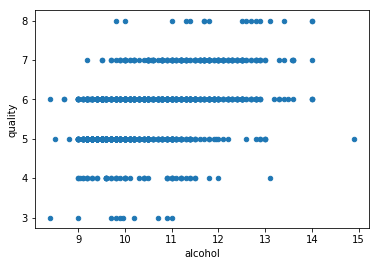

In [24]:
# Plot the relationship between alcohol and wine quality
wine_data.plot(kind='scatter', x='alcohol', y='quality')
plt.show()